# Aggregation and Visualization of metrics with Mastermind

The objective here is to aggregate the metrics over multiple tasks or goals and quantify the agent's overall performance. To do this, we store each of the metrics object in metrics_array and then call the *aggregate_metrics* function to compute the aggregated values. The aggregated values consist of a dictionary with keys: success_rate (float), progress_rate_array (list of lists), repetition_rate_array (list of floats). 

Then, we plot these aggregated values to visualize the agent's performance for a particular benchmark. 

In [1]:
from agentquest.benchmarks.mastermind import (
    MasterMindDriver,
    MasterMindUtils,
    MasterMindAction,
)

metrics_array = []

Here we are basically running the MasterMind benchmark with random guesses (replace this with agent's guess when benchmarking with agents). We run for 20 mastermind tasks. 

The maximum number of guesses we make is 11 and hence the num_execution_steps is 11.

In [2]:
import random

metrics_array = []
exported_metrics_array = []

for index in range(20):
    game = MasterMindUtils.load_data(category="4 digits")[index]
    goal = game
    print(goal)
    driver = MasterMindDriver(goal=goal)
    obs = driver.reset()
    print(obs.output)

    for i in range(10):
        guess_num = random.randint(1000, 9999)
        if (index % 3 == 0) and (guess_num % 2 == 0):
            guess_num = 1234
        obs = driver.step(MasterMindAction(value=str(guess_num)))  # Agent's guess here
        if obs.success:
            break
    if obs.success:
        print(obs.output)
        continue
    dice = random.randint(0, 1)
    if dice == 0:
        pass
    else:
        obs = driver.step(MasterMindAction(value=goal))
        print(obs.output)

    metrics_array.append(driver.metrics)
    exported_metrics_array.append(
        driver.metrics.export(
            repetition_function_kwargs={"theta_a": 1, "num_execution_steps": 11}
        )
    )

5918
You are tasked to play the Mastermind game.
The host chooses a number and gives you the amount of digits. You have to guess the correct number as fast as you can.
The number can contain repetitions and any possible digit between: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9.
At each round, you provide a number as a guess. At each step, the host provides you this information:
1. The number of correct digits in the wrong position.
2. The number of correct digits in the correct position.
The game ends when the host outputs 'You Won!'
Carefully choose your strategy. Avoid brute force.
The guess must be in the following format:
Guess: <number>
Start guessing the 4 digits number.
8607
You are tasked to play the Mastermind game.
The host chooses a number and gives you the amount of digits. You have to guess the correct number as fast as you can.
The number can contain repetitions and any possible digit between: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9.
At each round, you provide a number as a guess. At each step, t

In [3]:
metrics_array

In [4]:
from agentquest.lib.metrics_utils import (
    aggregate_metrics,
    plot_individual_progress_rates,
    plot_all_progress_rates,
    plot_repetition_rates,
    plot_individual_actions,
)

aggregated = aggregate_metrics(
    metrics_array=metrics_array,
    repetition_function_kwargs={"theta_a": 1, "num_execution_steps": 11},
)
aggregated_from_exported = aggregate_metrics(
    metrics_array=exported_metrics_array,
    repetition_function_kwargs={"theta_a": 1, "num_execution_steps": 11},
)
aggregated

{'goal_array': ['5918',
  '8607',
  '9605',
  '4040',
  '8863',
  '9439',
  '6300',
  '9148',
  '1870',
  '8948',
  '9429',
  '3077',
  '9400',
  '2798',
  '5998',
  '1721',
  '2469',
  '5335',
  '4295',
  '2967'],
 'success_array': [False,
  True,
  False,
  False,
  True,
  True,
  True,
  False,
  False,
  True,
  False,
  True,
  True,
  False,
  True,
  False,
  True,
  True,
  False,
  True],
 'success_rate': 0.55,
 'progress_rate_array': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0],
  [0.25, 0.25, 0.0, 0.0, 0.0, 0.25, 0.0, 0.25, 0.5, 0.0, 1.0],
  [0.5, 0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.25, 0.25, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.25, 0.25, 0.0, 1.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 1.0],
  [0.0, 0.0, 0.0, 0.25, 0.5, 0.0, 0.0, 0.25, 0.0, 0.0, 1.0],
  [0.25, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.25],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.25, 0.0, 0.25],
  [0.0, 0.0, 0.0, 0.0

In [5]:
aggregated["progress_rate_array"][0]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0]

### Plot individual progress rates one by one over each step

Use the previous and next button to view progress chart for other goals.

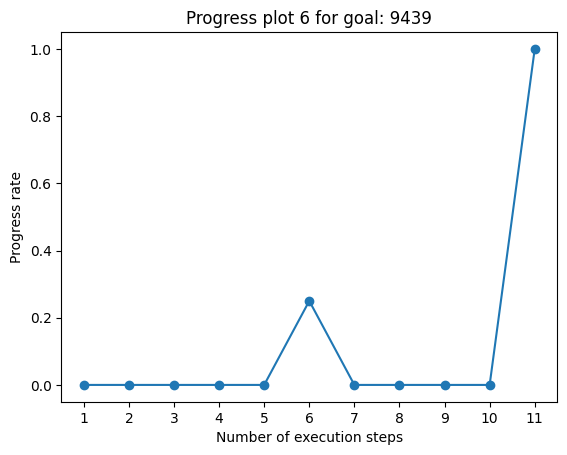

In [6]:
plot_individual_progress_rates(aggregated)

### Plot progress rates for all goals in one chart


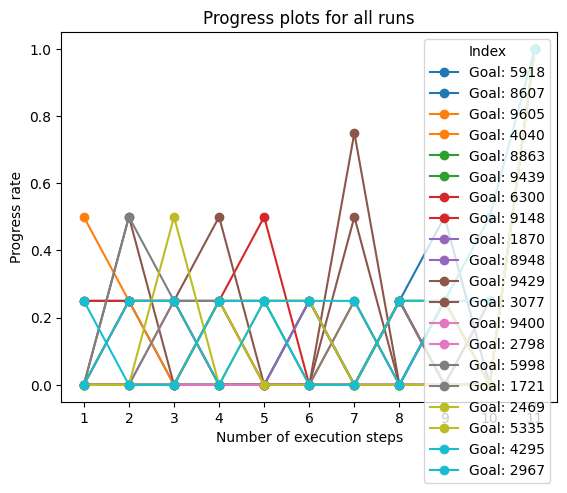

In [7]:
plot_all_progress_rates(aggregated)

### Plotting individual actions

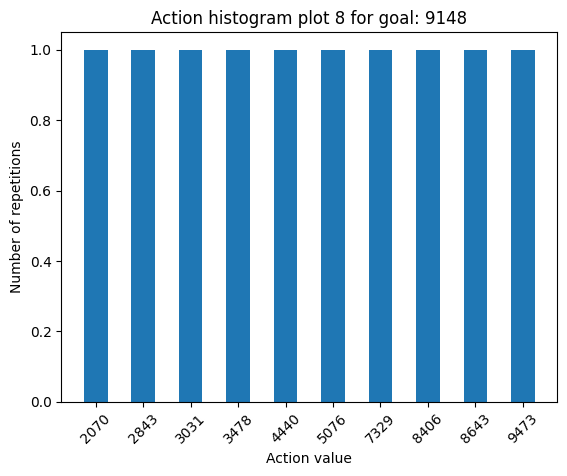

In [8]:
plot_individual_actions(metrics_array)

### Plot aggregated repetition rate distribution with KDE plot

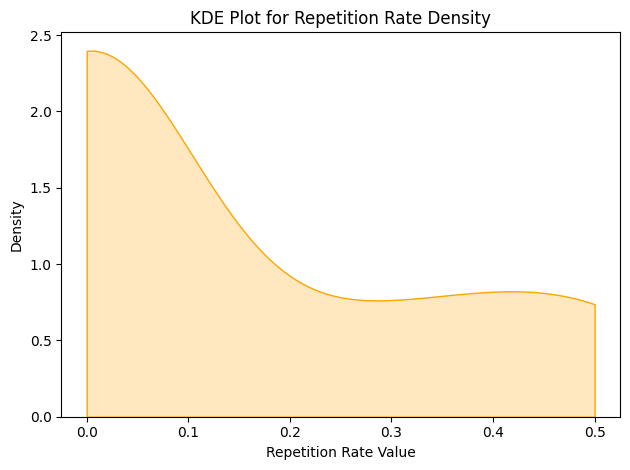

In [ ]:
plot_repetition_rates(aggregated)
# TODO: Probability Density Function
# TODO: Not just average but also min max, outliers, median